# 工商時報的共矩陣

In [1]:
import os
import jieba
import numpy as np
from collections import Counter
# pip install gensim
from gensim.corpora import Dictionary

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


### 讀入stopwords

In [2]:
stopwords = []
jieba.set_dictionary('./jieba_data/dict.txt.big')
jieba.load_userdict('./jieba_data/userdict.txt')

with open('./jieba_data/stopwords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopwords.append(data)

Building prefix dict from C:\Users\R\Desktop\github檔案\2019spring-data-mining\HW2\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\R\AppData\Local\Temp\jieba.u9a9d1ba96cca8ebf92c3837ab3abc275.cache
Loading model cost 1.347 seconds.
Prefix dict has been built succesfully.


In [3]:
def getTokens(text):
    tokens = []
    if len(text) > 0:
        segments = jieba.cut(text,cut_all=False)
        for t in segments:
            t = t.strip()
            if not t in stopwords:
                tokens.append(t)
    return tokens

In [4]:
def getText(filename):
    with open(filename,'r', encoding='UTF-8') as file:
        lines = file.readlines()
        
    news_title = lines[2]
    news_body = lines[3]
    text = news_title + news_body
    return(text)    

### 取出全部文件(180個)的內容做斷詞

In [5]:
text = ''
dir_path = './ctee_TSMC'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path,file)
    if os.path.isfile(file_path) and not file.startswith('.'):
        text = text + getText(file_path)

tokens = getTokens(text)

### 共有約2萬個詞

In [6]:
print(len(tokens))

19702


In [7]:
tokens[0:10]

['摩爾定律', '推進', '台積電', '領先', '布局', '奈米', '奈米', '|', '科技', '脈動']

In [8]:
#counter = Counter(tokens)
#print(len(counter))

In [9]:
#counter

### 共有約5000個不重複詞

# 修改處
# 加入助教篩選字詞意義的方式

In [10]:
from tamodules import *
cutted_dict = get_cutted_dict(tokens)
high_freq_pair = first_n_words(cutted_dict, 500)
high_freq_pair[0:2]

[('台積電', 435), ('工商時報', 197)]

In [11]:
all_tokens = []
for t in high_freq_pair:
    all_tokens.append(t[0])

print(all_tokens)    

['台積電', '工商時報', '億元', '台積', '奈米', '營收', '外資', '製程', '今日焦點', '積電', '市場', '10', '晶圓', '台股', '法人', '成長', '去年', '科技', '股價', '代工', '脈動', '股利', '預期', '龍頭', '半導體', '現金', '2330', '買超', '新高', '第一季', '台灣', '12', '市值', '晶片', '蘋果', '影響', '指出', '產業', '技術', '先進', '新台幣', '可望', '客戶', '上漲', '公司', '每股', '持續', '設計', '營運', '第四季', '全球', '投資', '獲利', '證券', '產能', '董事長', '手機', '歷史', '預估', '訂單', '指數', '合併', '11', '處理器', '張忠謀', '未來', '大立光', '16', '董事會', '明年', '減少', '個股', '億美元', '2019年', '展望', '包括', '帶動', '財經', '2018年', '毛利率', '發展', '美元', '表現', '增加', '聯發科', '全年', '受惠', '13', '需求', '業績', '出貨', '兆元', '2020年', '產品', '14', '漲幅', '行情', '即時新聞', '事件', '創新', '20', '盤中', '第二季', '創意', '配發', '營收達', '大陸', '看好', '量產', '震盪', '季減', '稅後', '紀錄', '英特爾', '優於', '企業', '營業', '淨利', '資金', '11月', '31', '去年同期', '運算', '動能', '權值', '評等', '比特', '加上', '發放', '鴻海', '21', '核准', '南京', '超過', '18', '金額', '利益', '機會', '員工', '國際', '大漲', '30', '17', '美國', '資本', '智慧型', '28', '上半年', '權證', '利率', '目標', '近期', '提供', '符合', '最新', '公布', '19', '計畫', '分析師', '布局', 

### 取出詞頻最高前500個詞(原本的方式)

### 過濾掉沒有在top 500裡的詞

In [12]:
def filterTokens(tokens):
    global all_tokens
    filtered_tokens = []
    for t in tokens:
        if t in all_tokens:
            filtered_tokens.append(t)
    return filtered_tokens

In [13]:
doc_tokens = []
dir_path = './ctee_TSMC'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path,file)
    if os.path.isfile(file_path) and not file.startswith('.'):
        wanted_tokens = []
        text = getText(file_path)
        tokens = getTokens(text)
        tokens2 = filterTokens(tokens)
        doc_tokens.append(tokens2)

In [14]:
doc_tokens[0]

['台積電',
 '領先',
 '布局',
 '奈米',
 '奈米',
 '科技',
 '脈動',
 '今日焦點',
 '工商時報',
 '持續',
 '代工',
 '龍頭',
 '台積',
 '技術',
 '創新',
 '可望',
 '先進',
 '製程',
 '持續',
 '奈米',
 '奈米',
 '世代',
 '台積',
 '電將',
 '000',
 '億元',
 '資金',
 '支援',
 '奈米',
 '奈米',
 '產能']

### 稀疏矩陣

In [15]:
sparse_matrix = []

dir_path = './ctee_TSMC'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path,file)
    if os.path.isfile(file_path) and not file.startswith('.'):
        text = getText(file_path)
        tokens = getTokens(text)
        doc_to_term = []
        for t in all_tokens:
            if t in tokens:
                doc_to_term.append(1)
            else:
                doc_to_term.append(0)
        sparse_matrix.append(doc_to_term)

### 共現矩陣

In [16]:
def co_occurrence_matrix(ls):
    global matrix
    length = len(ls)
    for i in range(length):
        for j in range(length):
            if i != j:
                #同一篇文章中 單詞和除了本身的單詞 出現次數+1
                matrix[[ls[i]], [ls[j]]] += 1

In [17]:
dimension = len(all_tokens)
matrix = np.matrix([[0] * dimension] * dimension)

dt = Dictionary(doc_tokens).token2id

# dt[doc_tokens[0][1]] = dt['領先']
# 將文字經過dt換成所代表數字
doc_token_ids = [[dt[word] for word in words] for words in doc_tokens]

for ids in doc_token_ids:
    co_occurrence_matrix(ids)

In [18]:
print(dt)

{'000': 0, '世代': 1, '今日焦點': 2, '代工': 3, '億元': 4, '先進': 5, '創新': 6, '可望': 7, '台積': 8, '台積電': 9, '奈米': 10, '工商時報': 11, '布局': 12, '技術': 13, '持續': 14, '支援': 15, '產能': 16, '科技': 17, '脈動': 18, '製程': 19, '資金': 20, '電將': 21, '領先': 22, '龍頭': 23, '11月': 24, '個股': 25, '出貨': 26, '創下': 27, '受惠': 28, '合併': 29, '單季': 30, '大廠': 31, '新高': 32, '晶圓': 33, '機會': 34, '歷史': 35, '法人': 36, '營收': 37, '營收達': 38, '產業': 39, '目標': 40, '第四季': 41, '紀錄': 42, '蘋果': 43, '處理器': 44, '順利': 45, '高檔': 46, '副總': 47, '台灣': 48, '張忠謀': 49, '營運': 50, '董事長': 51, '10': 52, '供應鏈': 53, '公司': 54, '積電': 55, '長期': 56, '員工': 57, '報導': 58, '大陸': 59, '近期': 60, '針對': 61, '2330': 62, '元為': 63, '台股': 64, '股價': 65, '31': 66, '匯率': 67, '去年': 68, '大關': 69, '市場': 70, '平均': 71, '影響': 72, '新台幣': 73, '美元匯率': 74, '表現': 75, '電在': 76, '預估': 77, '首季': 78, '2017': 79, '去年同期': 80, '增加': 81, '300': 82, '排名': 83, '跌破': 84, '鴻海': 85, '價值': 86, '億美元': 87, '半導體': 88, '國際': 89, '外資': 90, '市值': 91, '投資人': 92, '指出': 93, '比重': 94, '英特爾': 95, '超越': 96, '21': 97, '3

In [19]:
print(matrix)

[[4 1 3 ... 0 0 0]
 [1 8 2 ... 0 0 0]
 [3 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
high_freq_pair[0]

('台積電', 435)

In [21]:
#查詢台積電出現次數
dict(high_freq_pair)["台積電"]

435

In [22]:
#字典轉換
td = { v: k for k, v in dt.items() }
for i in range(10):
    print(td[i])

000
世代
今日焦點
代工
億元
先進
創新
可望
台積
台積電


In [23]:
import pandas as pd
# dataframe.rename(index= dict1, columns= dict2)
data = pd.DataFrame(matrix).rename(index=td,columns=td)


In [24]:
data.iloc[1:6,1:6]

,世代,今日焦點,代工,億元,先進
世代,8,2,5,5,14
今日焦點,2,0,47,49,19
代工,5,47,26,92,42
億元,5,49,92,728,27
先進,14,19,42,27,44


In [25]:
# 與台積電最相關的前k名的名稱和次數
text = '台積電'
arr = np.array(data.loc[text])
k = 6
# 看前k多的出現次數
b = arr.argsort()[-k:][::-1]
data.iloc[b,dt[text]]

台積電     1250
億元       578
營收       531
奈米       524
台積       519
工商時報     464
Name: 台積電, dtype: int32

In [26]:
data.columns

Index([ '000',   '世代', '今日焦點',   '代工',   '億元',   '先進',   '創新',   '可望',   '台積',
        '台積電',
       ...
          490,    491,    492,    493,    494,    495,    496,    497,    498,
          499],
      dtype='object', length=500)

In [27]:
# 顯示其中幾筆資料
datasmall = data.iloc[0:10,0:10]
datasmall

,000,世代,今日焦點,代工,億元,先進,創新,可望,台積,台積電
000,4,1,3,6,14,1,1,6,11,26
世代,1,8,2,5,5,14,7,1,11,30
今日焦點,3,2,0,47,49,19,10,14,81,207
代工,6,5,47,26,92,42,10,31,73,231
億元,14,5,49,92,728,27,9,70,166,578
先進,1,14,19,42,27,44,11,12,37,128
創新,1,7,10,10,9,11,14,8,34,71
可望,6,1,14,31,70,12,8,18,56,153
台積,11,11,81,73,166,37,34,56,230,519
台積電,26,30,207,231,578,128,71,153,519,1250


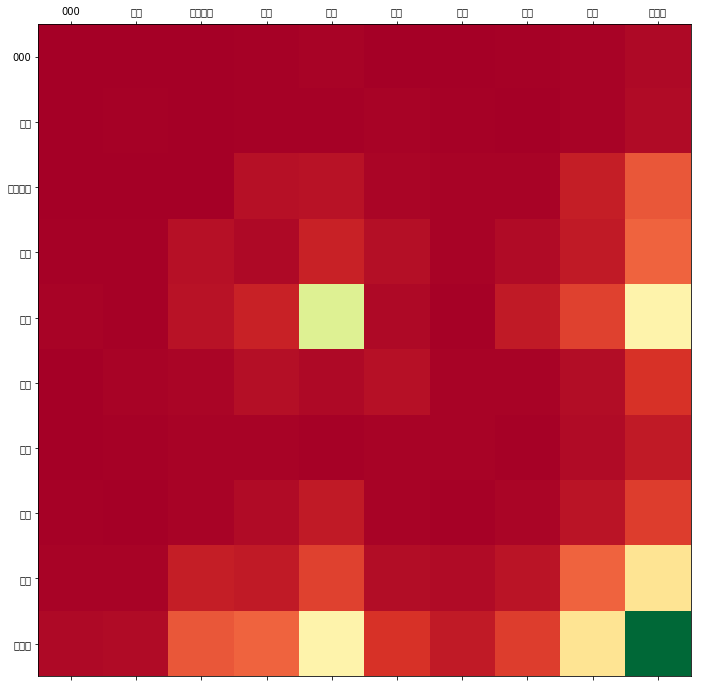

In [28]:
import matplotlib.pyplot as plt

labels = [c for c in datasmall.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(datasmall, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

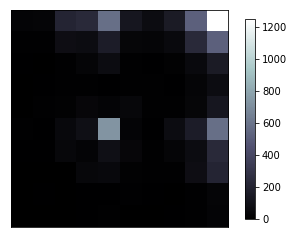

In [29]:
plt.imshow(datasmall, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()